In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import xarray as xr

In [11]:
df = pd.read_csv(r"/workspaces/computational_methods_course_Roz_Roberts/data/LeafRiverDaily.csv")


L = df.shape[0]

print(L)
df


10960


,Precipitation,Temperature,Streamflow
0,0.0000,4.6004,0.289951
1,0.0000,4.3092,0.244761
2,0.0000,4.3286,0.213382
3,0.0000,4.7777,0.193298
4,0.0000,2.9110,0.183258
...,...,...,...
10955,0.0000,3.1170,0.144348
10956,0.0000,2.6248,0.148112
10957,0.0000,4.9893,0.148466
10958,0.0000,4.5724,0.142589


In [12]:
R = L//91

print(f"Number of Data Points Removed From the end of the Dataset: {L-(R*91)}")
print("Removed Inhomogenous Data at the end of the dataset")

dr = df[:R*91]  # Removed the inhomogenous data at the end of the dataset

dr

Number of Data Points Removed From the end of the Dataset: 40
Removed Inhomogenous Data at the end of the dataset


,Precipitation,Temperature,Streamflow
0,0.0000,4.6004,0.289951
1,0.0000,4.3092,0.244761
2,0.0000,4.3286,0.213382
3,0.0000,4.7777,0.193298
4,0.0000,2.9110,0.183258
...,...,...,...
10915,5.7228,5.1605,0.199574
10916,0.0000,6.2402,0.194557
10917,0.0000,5.9708,0.202088
10918,0.0000,5.8337,0.193298


In [13]:
dt = dr.values.reshape(R, 91, 3)
dt = xr.DataArray(dt, dims=["Sample","Days", "Variables"], coords={"Sample" : range(R), "Days": range(91), "Variables" : ["Precipitation", "Temperature", "Streamflow"]})
dt

<xarray.DataArray (Sample: 120, Days: 91, Variables: 3)> Size: 262kB
array([[[ 0.        ,  4.6004    ,  0.28995124],
        [ 0.        ,  4.3092    ,  0.24476064],
        [ 0.        ,  4.3286    ,  0.21338209],
        ...,
        [ 3.9206    ,  0.8568    ,  2.0710683 ],
        [20.8507    ,  0.6943    ,  2.974805  ],
        [ 0.        ,  1.1605    ,  3.753023  ]],

       [[ 0.        ,  1.2924    ,  3.4266755 ],
        [ 0.        ,  1.063     ,  2.974805  ],
        [ 0.        ,  0.8928    ,  2.3848626 ],
        ...,
        [ 7.6766    ,  0.7211    ,  7.1420434 ],
        [95.4076    ,  1.0108    ,  7.3679743 ],
        [ 4.8278    ,  3.5503    , 22.216893  ]],

       [[ 0.        ,  3.9553    , 26.861095  ],
        [ 0.        ,  0.9798    , 19.832021  ],
        [ 0.126     ,  1.4095    , 11.52266   ],
        ...,
...
        ...,
        [ 0.        ,  0.863     ,  0.81964096],
        [ 0.        ,  2.0527    ,  0.77696365],
        [ 0.        ,  2.5071    ,  0.74307181]],

       [[ 0.        ,  2.5271    ,  0.72173316],
        [ 5.7321    ,  1.5022    ,  0.70541667],
        [ 3.5372    ,  2.3734    ,  0.81587323],
        ...,
        [ 0.1043    ,  4.6819    ,  0.93386082],
        [ 0.        ,  5.697     ,  0.69663121],
        [ 0.        ,  6.0685    ,  0.59119681]],

       [[ 0.        ,  6.6875    ,  0.52090426],
        [ 5.4862    ,  6.7355    ,  0.47195035],
        [ 6.9553    ,  2.948     ,  0.44559397],
        ...,
        [ 0.        ,  5.9708    ,  0.20208777],
        [ 0.        ,  5.8337    ,  0.19329787],
        [13.4814    ,  4.3644    ,  0.24476064]]], shape=(120, 91, 3))
Coordinates:
  * Sample     (Sample) int64 960B 0 1 2 3 4 5 6 ... 113 114 115 116 117 118 119
  * Days       (Days) int64 728B 0 1 2 3 4 5 6 7 8 ... 83 84 85 86 87 88 89 90
  * Variables  (Variables) <U13 156B 'Precipitation' 'Temperature' 'Streamflow'

In [14]:
Q = dt.sel(Days=90,  Variables="Streamflow")
P = dt.sel(Days=slice(0, 89), Variables="Precipitation").values
T = dt.sel(Days=slice(0, 89), Variables="Temperature").values

PT = np.column_stack((P, T))
print(PT.shape)
print(Q.shape)

PT


(120, 180)
(120,)


array([[0.    , 0.    , 0.    , ..., 0.8299, 0.8568, 0.6943],
       [0.    , 0.    , 0.    , ..., 1.3183, 0.7211, 1.0108],
       [0.    , 0.    , 0.126 , ..., 5.0351, 5.3442, 5.2987],
       ...,
       [0.    , 0.    , 4.0021, ..., 1.648 , 0.863 , 2.0527],
       [0.    , 5.7321, 3.5372, ..., 3.6693, 4.6819, 5.697 ],
       [0.    , 5.4862, 6.9553, ..., 6.2402, 5.9708, 5.8337]],
      shape=(120, 180))

In [15]:
train_cut = int(0.8*120)

PT_train = PT[:train_cut]
PT_test = PT[train_cut:]
Q_train = Q[:train_cut]
Q_test = Q[train_cut:]

Model: slope = -0.010994616324996459, intercept = 0.5611006054800429
R^2 Score: -1.084913355542831
Mean Absolute Error: 1.7863320506626372
Sum of Squared Differences Predicted: 226.8072968389113
Sum of Squared Differences Actual: 148.5515256719191


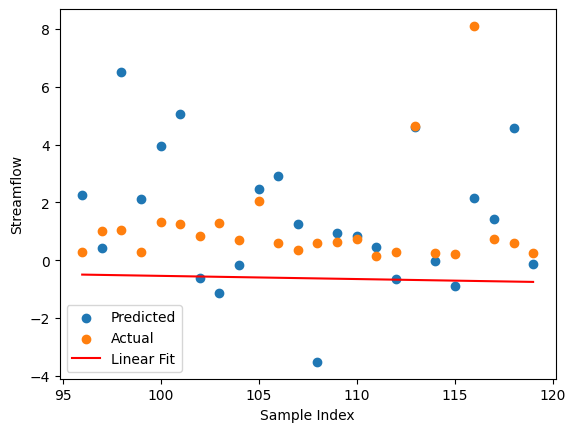

In [24]:
model = LinearRegression()
model.fit(PT_train, Q_train)

print(f"Model: slope = {model.coef_[0]}, intercept = {model.intercept_}")

Q_pred = model.predict(PT_test)

X = np.linspace(0,len(Q_pred)-1, len(Q_pred)) + train_cut
Y = X*model.coef_[0] + model.intercept_

plt.scatter(X, Q_pred, label="Predicted")
plt.scatter(X, Q_test, label="Actual")
plt.plot(X, Y, label="Linear Fit", color="red")
plt.xlabel("Sample Index")
plt.ylabel("Streamflow")
plt.legend()

print(f"R^2 Score: {r2_score(Q_test, Q_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(Q_test, Q_pred)}")
print(f"Sum of Squared Differences Predicted: {float(np.sum((Q_pred - Y)**2))}")
print(f"Sum of Squared Differences Actual: {float(np.sum((Q_test - Y)**2))}")